In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn import svm

%matplotlib inline
# Get optimal parameter after tuning
def getParameters(dataframe, model,param_grid):  
    X = dataframe.iloc[:,:28].values
    Y = dataframe.iloc[:,28].values 
    grid = GridSearchCV(model, param_grid, cv=10,  return_train_score=True) 
    # fitting the model for grid search 
    grid.fit(X, Y) 
    # print best parameter after tuning 
    print("The best parameters:")
    print(grid.best_params_) 
    data= pandas.DataFrame(grid.cv_results_)
    Plot_graph(data)
    
    #plot grapgh after parameter tuning
def Plot_graph(df):
    plt.figure(figsize=(7, 3))
    plt.plot(df["param_C"],df["mean_train_score"], label="Training Score")
    plt.plot(df["param_C"],df["mean_test_score"], label="Cross-validation Score", linestyle='dotted')
    plt.title("GridSearchCV results for optimal parameter\n ", fontsize=14)
    plt.xlabel("Learning Parameter", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="best")
    plt.grid(True)   

In [2]:
import warnings
warnings.filterwarnings("ignore")

# EXPERIEMENT USING SUPPORT VECTOR MACHINE

# Optimal Parameter Searching

In [3]:
user1= pandas.read_csv('../FedAnalysis2/Data/Client1.csv')
user2= pandas.read_csv('../FedAnalysis2/Data/Client2.csv')
user3= pandas.read_csv('../FedAnalysis2/Data/Client3.csv')
user4= pandas.read_csv('../FedAnalysis2/Data/Client4.csv')
user5= pandas.read_csv('../FedAnalysis2/Data/Client5.csv')
user6= pandas.read_csv('../FedAnalysis2/Data/Client6.csv')
user7= pandas.read_csv('../FedAnalysis2/Data/Client7.csv')

svm_estimator = svm.SVC(kernel='linear', class_weight='balanced')
param_grid = {'C': [0.001, 0.002,0.003, 0.004, 0.005],  
  
              'kernel': [ 'linear']}  

The best parameters:
{'C': 0.001, 'kernel': 'linear'}


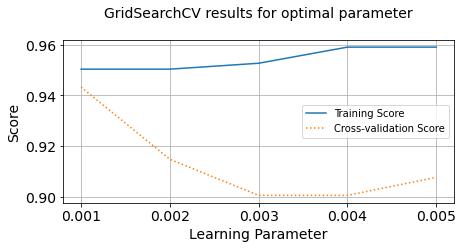

In [4]:
getParameters(user1,svm_estimator,param_grid)

The best parameters:
{'C': 0.003, 'kernel': 'linear'}


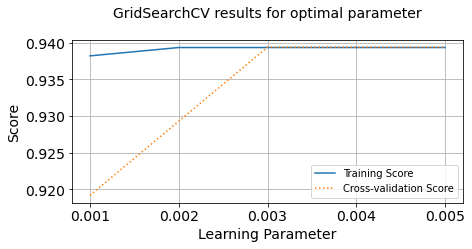

In [5]:
getParameters(user2,svm_estimator,param_grid)

The best parameters:
{'C': 0.001, 'kernel': 'linear'}


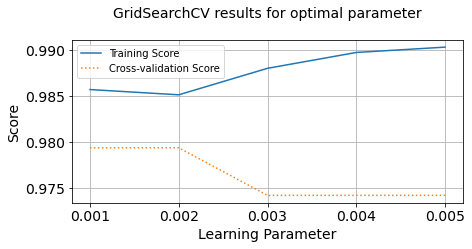

In [6]:
getParameters(user3, svm_estimator,param_grid)

The best parameters:
{'C': 0.003, 'kernel': 'linear'}


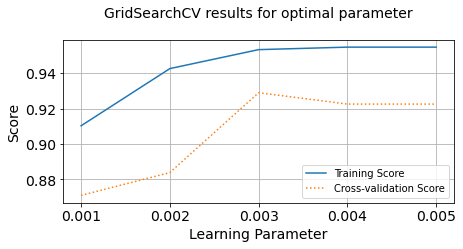

In [7]:
getParameters(user4, svm_estimator,param_grid)

The best parameters:
{'C': 0.001, 'kernel': 'linear'}


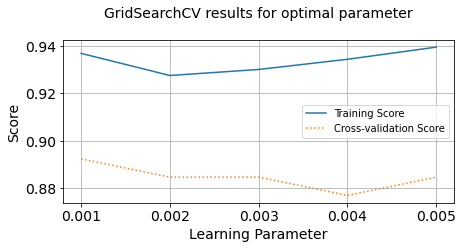

In [8]:
getParameters(user5, svm_estimator,param_grid)

The best parameters:
{'C': 0.005, 'kernel': 'linear'}


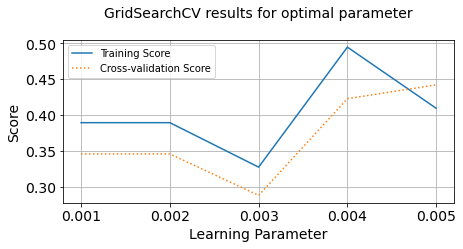

In [9]:
getParameters(user6, svm_estimator,param_grid)

The best parameters:
{'C': 0.004, 'kernel': 'linear'}


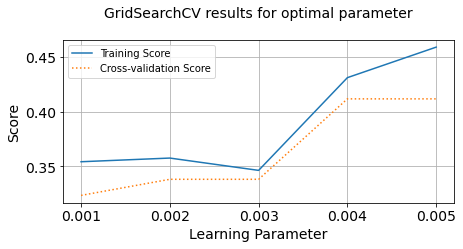

In [10]:
getParameters(user7, svm_estimator,param_grid)

# Federated Approach After Model Aggregation

In [11]:
from sklearn.metrics import accuracy_score
train= pandas.read_csv('../FedAnalysis2/GlobalTrain.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:28].values
Y_train = train.iloc[:,28].values
#Test Dataset
X_test = test.iloc[:,:28].values
Y_test = test.iloc[:,28].values
#Train model
model = svm.SVC(kernel='linear', C=0.002)
model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)

Accuracy: 0.77


# EXPERIEMENT WITH LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression
logic_estimator = LogisticRegression(random_state=0, class_weight='balanced')

param_grid2 = {'C': [0.001, 0.002,0.003, 0.004, 0.005]  } 

# Optimal Parameter Searching

The best parameters:
{'C': 0.001}


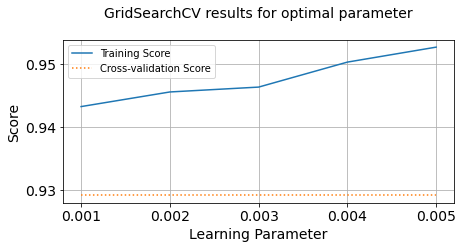

In [13]:
getParameters(user1,logic_estimator,param_grid2)

The best parameters:
{'C': 0.005}


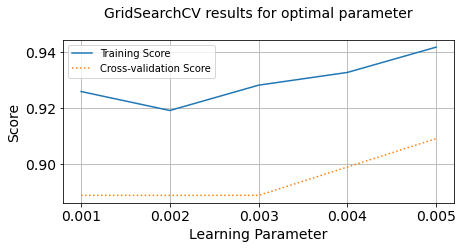

In [14]:
getParameters(user2,logic_estimator,param_grid2)

The best parameters:
{'C': 0.001}


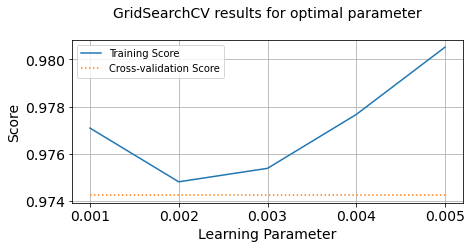

In [15]:
getParameters(user3,logic_estimator,param_grid2)

The best parameters:
{'C': 0.003}


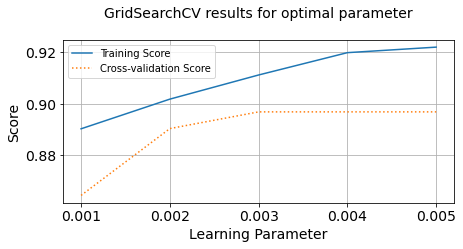

In [16]:
getParameters(user4,logic_estimator,param_grid2)

The best parameters:
{'C': 0.004}


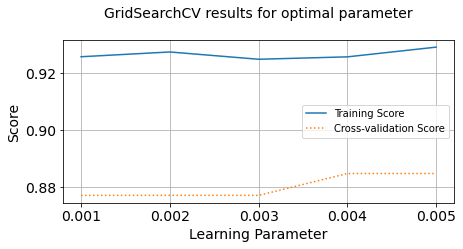

In [17]:
getParameters(user5,logic_estimator,param_grid2)

The best parameters:
{'C': 0.005}


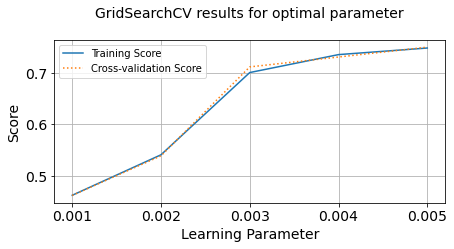

In [18]:
getParameters(user6,logic_estimator,param_grid2)

The best parameters:
{'C': 0.005}


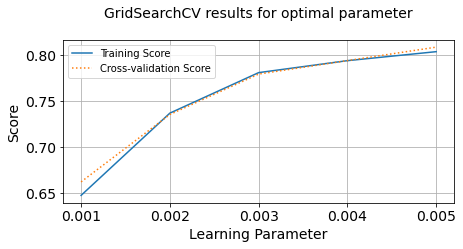

In [19]:
getParameters(user7,logic_estimator,param_grid2)

# Federated Approach after Model Aggregation

In [20]:
from sklearn.metrics import accuracy_score
train= pandas.read_csv('../FedAnalysis2/GlobalTrain.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:28].values
Y_train = train.iloc[:,28].values
#Test Dataset
X_test = test.iloc[:,:28].values
Y_test = test.iloc[:,28].values
#Train model
model = LogisticRegression( C=0.003, random_state=0)
model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)

Accuracy: 0.80
